In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

#### Checking glimpse of data

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


#### Checking info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


- 210 Non Null values in every column
- every data type is float64

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

#### Checking summary

In [6]:
df_des = df.describe().T
df_des['IQR'] = df_des['75%'] - df_des['25%']
df_des['COV'] = df_des['std']/df_des['mean']
df_des

,count,mean,std,min,25%,50%,75%,max,IQR,COV
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800,5.035000,0.195972
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500,2.265000,0.089699
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183,0.030875,0.027129
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750,0.717500,0.078717
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330,0.617750,0.115913
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560,2.207250,0.406345
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500,0.832000,0.090879


- Observing the COV, the data is quite uniform

#### Checking shape and duplicates

In [7]:
print('Shape of data is:', df.shape)
print('Duplicates:', df.duplicated().sum())

Shape of data is: (210, 7)
Duplicates: 0


#### Univariate analysis

In [20]:
def univariate(col):
    print('Description of',col,' is: -')
    print(df[col].describe())
    print(' ')
    print('-----------------------------------------------------------')
    print("Mean is: ", df[col].mean())
    print("Median is: ", df[col].median())
    print("Mode is: ", df[col].mode()[0])
    print('-----------------------------------------------------------')
    print(" ")
    
    print("Distribution of ", col, ' is: -')
    
    sns.displot(x = df[col], kde = True, height = 3)
    plt.axvline(x = df[col].mean(), color = 'green',label = 'mean')
    plt.axvline(x = df[col].median(), color = 'red', label = 'median')
    plt.axvline(x = df[col].mode()[0], color = 'yellow', label = 'mode')
    plt.legend()
    plt.show()
    
    print('-----------------------------------------------------------')
    print(' ')
    print('Boxplot of',col,' is: -')
    plt.figure(figsize = (3,2))
    sns.boxplot(x = df[col],width = .6)
    plt.show()
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    print(' ')

Description of spending  is: -
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64
 
-----------------------------------------------------------
Mean is:  14.847523809523818
Median is:  14.355
Mode is:  11.23
-----------------------------------------------------------
 
Distribution of  spending  is: -


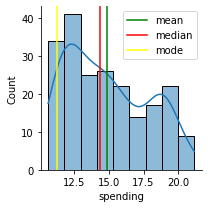

-----------------------------------------------------------
 
Boxplot of spending  is: -


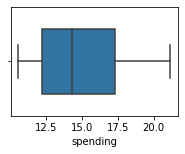

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of advance_payments  is: -
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64
 
-----------------------------------------------------------
Mean is:  14.559285714285727
Median is:  14.32
Mode is:  13.47
-----------------------------------------------------------
 
Distribution of  advance_payments  is: -


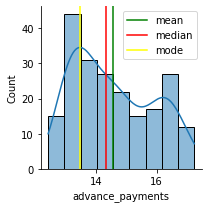

-----------------------------------------------------------
 
Boxplot of advance_payments  is: -


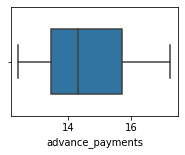

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of probability_of_full_payment  is: -
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64
 
-----------------------------------------------------------
Mean is:  0.8709985714285714
Median is:  0.8734500000000001
Mode is:  0.8823
-----------------------------------------------------------
 
Distribution of  probability_of_full_payment  is: -


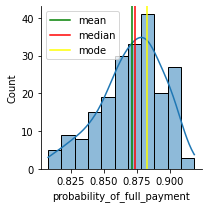

-----------------------------------------------------------
 
Boxplot of probability_of_full_payment  is: -


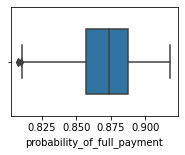

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of current_balance  is: -
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64
 
-----------------------------------------------------------
Mean is:  5.628533333333334
Median is:  5.5235
Mode is:  5.236000000000001
-----------------------------------------------------------
 
Distribution of  current_balance  is: -


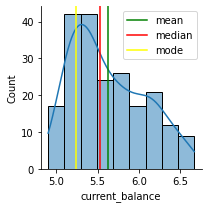

-----------------------------------------------------------
 
Boxplot of current_balance  is: -


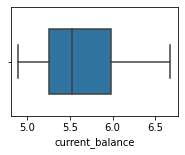

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of credit_limit  is: -
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64
 
-----------------------------------------------------------
Mean is:  3.258604761904763
Median is:  3.237
Mode is:  3.0260000000000002
-----------------------------------------------------------
 
Distribution of  credit_limit  is: -


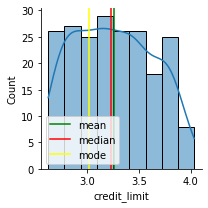

-----------------------------------------------------------
 
Boxplot of credit_limit  is: -


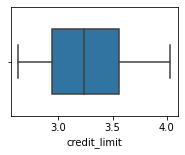

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of min_payment_amt  is: -
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64
 
-----------------------------------------------------------
Mean is:  3.7002009523809507
Median is:  3.599
Mode is:  2.129
-----------------------------------------------------------
 
Distribution of  min_payment_amt  is: -


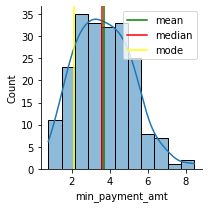

-----------------------------------------------------------
 
Boxplot of min_payment_amt  is: -


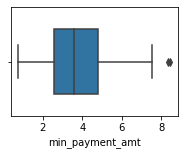

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of max_spent_in_single_shopping  is: -
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64
 
-----------------------------------------------------------
Mean is:  5.408071428571429
Median is:  5.223000000000001
Mode is:  5.001
-----------------------------------------------------------
 
Distribution of  max_spent_in_single_shopping  is: -


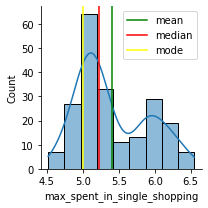

-----------------------------------------------------------
 
Boxplot of max_spent_in_single_shopping  is: -


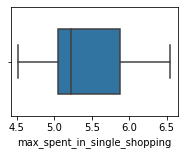

-----------------------------------------------------------
-----------------------------------------------------------
 


In [21]:
for i in df.columns:
    univariate(i)

#### Bivariate analysis

<Figure size 504x504 with 0 Axes>

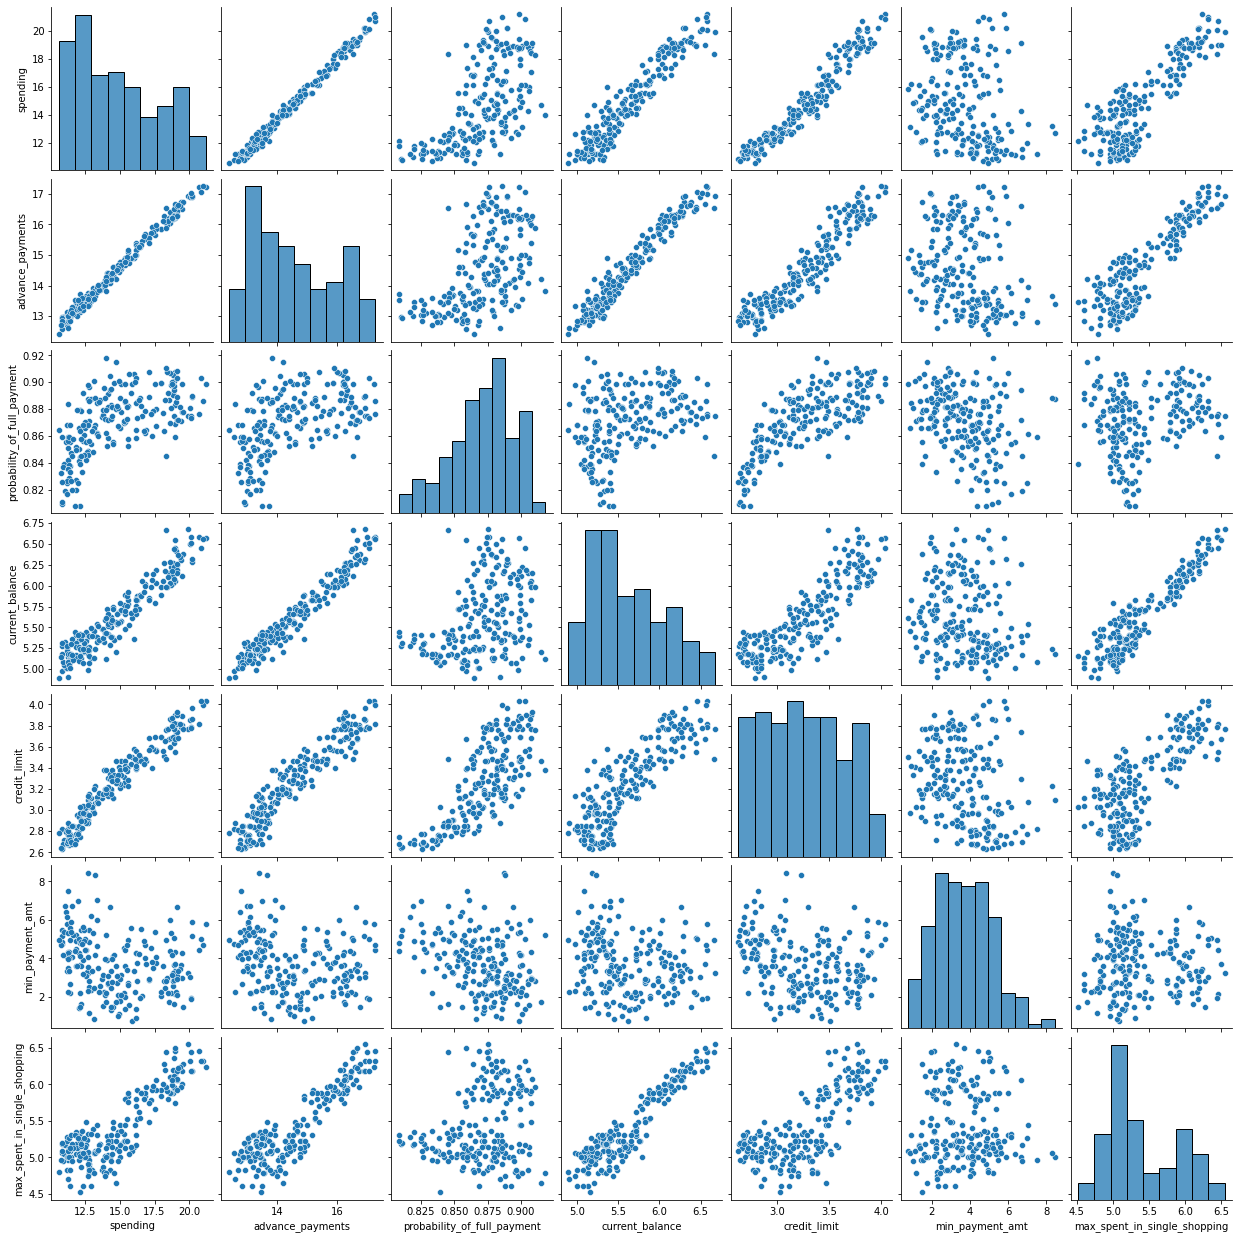

In [22]:
plt.figure(figsize = (7,7))
sns.pairplot(data = df)

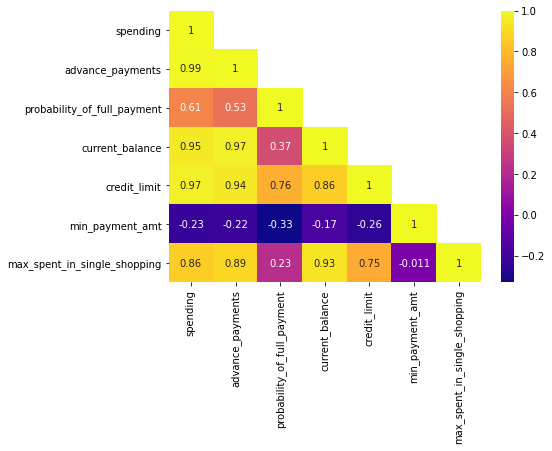

In [23]:
plt.figure(figsize = (7,5))
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df.corr(),mask = mask, annot = True, cmap = 'plasma');

- High corelation : Spending, advance payments, current_balance, current_balance, credit_limit

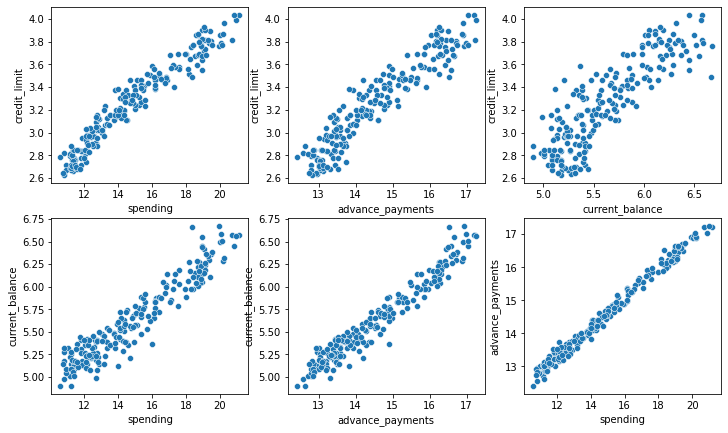

In [32]:
plt.figure(figsize = (12,11))

plt.subplot(3,3,1)
sns.scatterplot(x = df['spending'],y = df['credit_limit']);

plt.subplot(3,3,2)
sns.scatterplot(x = df['advance_payments'],  y = df['credit_limit']);

plt.subplot(3,3,3)
sns.scatterplot(x = df['current_balance'], y = df['credit_limit']);

plt.subplot(3,3,4)
sns.scatterplot(x = df['spending'], y= df['current_balance']);

plt.subplot(3,3,5)
sns.scatterplot(x = df['advance_payments'], y = df['current_balance']);

plt.subplot(3,3,6)
sns.scatterplot(x = df['spending'], y = df['advance_payments']);

# 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [33]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [36]:
df_des.iloc[:,1:8]

,mean,std,min,25%,50%,75%,max
spending,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


- Looking at the description , we can certainly conclude, scaling is required for the data

In [37]:
from scipy.stats import zscore

In [38]:
df_scaled = df.apply(zscore)

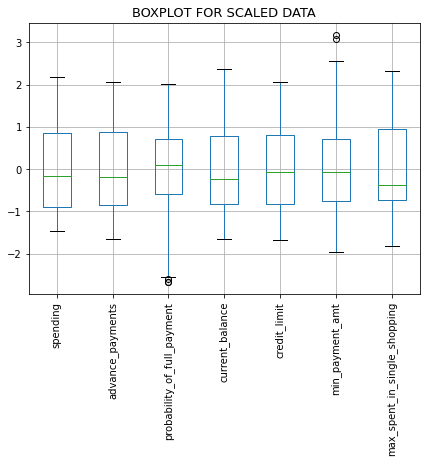

In [41]:
df_scaled.boxplot(figsize = (7,5))
plt.title('BOXPLOT FOR SCALED DATA',fontsize = 13)
plt.xticks(rotation = 90);


# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

#### Using F clusters

In [42]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [43]:
ward = linkage(df_scaled, method='ward', metric='euclidean')

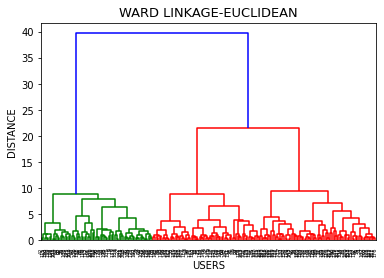

In [44]:
plt.title("WARD LINKAGE-EUCLIDEAN", fontsize = 13)
plt.xlabel('USERS')
plt.ylabel('DISTANCE')
dend = dendrogram(ward)

- From the above dendrogram it seems, 3 clusters would be a good choice
- The intercluster distance is sufficent enough for the clusters to be well segregated, hence  p =3.

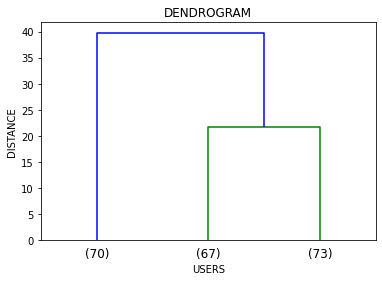

In [49]:
p = 3
plt.title('DENDROGRAM')
plt.xlabel('USERS')
plt.ylabel('DISTANCE')
dend = dendrogram(ward,p,truncate_mode = 'lastp')

In [47]:
from scipy.cluster.hierarchy import fcluster

In [50]:
clusters_ward = fcluster(ward,p,criterion='maxclust' )

In [51]:
df["Clusters_hierarchichal"] = clusters_ward

#### Cluster frequency

In [52]:
df['Clusters_hierarchichal'].value_counts()

3    73
1    70
2    67
Name: Clusters_hierarchichal, dtype: int64

#### Cluster profiles

In [93]:
agg_data = df.groupby('Clusters_hierarchichal')[['spending','advance_payments','probability_of_full_payment','current_balance',
                                           'credit_limit','min_payment_amt','max_spent_in_single_shopping']].mean()
agg_data['Frequency'] = df['Clusters_hierarchichal'].value_counts().sort_index()
agg_data.T

Clusters_hierarchichal,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Frequency,70.000000,67.000000,73.000000


- Cluster 1: - Highest spenders, with high current balance, credit limit
             - Makes the most of the advance payments and the probability of full payment is also high.
             - Belong to the rich and elite group
             
- Cluster 2: - Lowest spenders, with least current balance , and lowest credit limit
             - Makes the least advance payments, probability of full payment is quite less comparitively
             - Belong to the class with average job pay.

- Cluster 3: - Mediorkre spending, current balance and credit limit
             - Makes a decent amount of advance paymenyt, also has a decent probability of full payment
             - Beling to the upper middle class


#### Agglomerative clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(df_scaled)
print(Cluster_agglo)

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 0 1 0 2 2 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 1 2 0 0 0 0 1
 1 0 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 1 0]


In [92]:
df['Agglo Clusters'] = Cluster_agglo
agglo_data = df.groupby('Agglo Clusters')[['spending','advance_payments','probability_of_full_payment','current_balance',
                                           'credit_limit','min_payment_amt','max_spent_in_single_shopping']].mean()
agglo_data['Frequency'] = df['Agglo Clusters'].value_counts().sort_index()
agglo_data.T

Agglo Clusters,0,1,2
spending,14.199041,18.371429,11.872388
advance_payments,14.233562,16.145429,13.257015
probability_of_full_payment,0.879190,0.884400,0.848072
current_balance,5.478233,6.158171,5.238940
credit_limit,3.226452,3.684629,2.848537
min_payment_amt,2.612181,3.639157,4.949433
max_spent_in_single_shopping,5.086178,6.017371,5.122209
Frequency,73.000000,70.000000,67.000000


In [61]:
agglo_data.iloc[:,5:10]

,min_payment_amt,max_spent_in_single_shopping,Clusters_hierarchichal,Frequency
Agglo Clusters,,,,
0,2.612181,5.086178,3,73
1,3.639157,6.017371,1,70
2,4.949433,5.122209,2,67


- The results for hierarchichal and agglomerative are same

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [63]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)

KMeans(n_clusters=3)

#### WSS Plot

In [64]:
wss = []
for i in range(2,20):
    k_means = KMeans(n_clusters = i)
    k_means.fit(df_scaled)
    wss.append(k_means.inertia_)

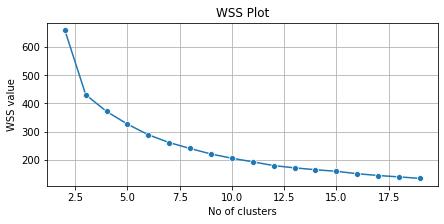

In [76]:
plt.figure(figsize = (7,3))
plt.grid(True)
plt.title('WSS Plot')
plt.xlabel('No of clusters')
plt.ylabel('WSS value')
sns.lineplot(x = range(2,20), y = wss, marker = 'o');

#### Silhoutte scores

In [77]:
sil_score = []
for i in range(2,20):
    k_means = KMeans(n_clusters = i)
    k_means.fit(df_scaled)
    label = k_means.labels_
    sil_score.append(silhouette_score(df_scaled, label))
    

<AxesSubplot:title={'center':'SILHOUTTE SCORE PLOT'}, xlabel='No of clusters', ylabel='Silhoutte score'>

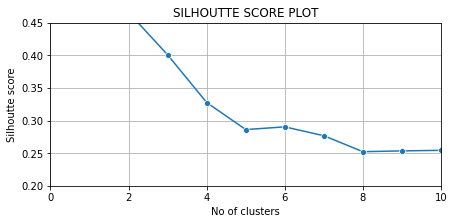

In [80]:
fig, ax = plt.subplots(figsize = (7,3))
plt.grid(True)
ax.set(ylim = (0.2,.45))
ax.set(xlim = (0,10))
plt.title('SILHOUTTE SCORE PLOT')
plt.xlabel('No of clusters')
plt.ylabel('Silhoutte score')
sns.lineplot(x = range(2,20), y = sil_score, marker = 'o')

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components = 2)
y = pca.fit_transform(df_scaled)

<AxesSubplot:>

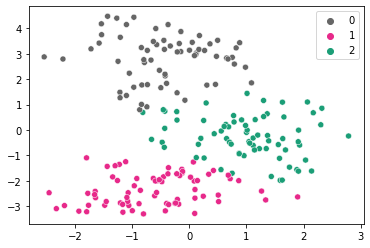

In [83]:
sns.scatterplot(x = y[:,1], y = y[:,0], hue = KMeans(n_clusters = 3).fit(df_scaled).labels_, palette= 'Dark2_r')

In [84]:
df['Clusters KMeans'] = KMeans(n_clusters = 3).fit(df_scaled).labels_

In [85]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters_hierarchichal,Agglo Clusters,Clusters KMeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0


#### Cluster profiling

In [90]:
agg_Kmeans = df.groupby('Clusters KMeans')[['spending','advance_payments','probability_of_full_payment','current_balance',
                                           'credit_limit','min_payment_amt','max_spent_in_single_shopping']].mean()
agg_Kmeans['Frequency'] = df['Clusters KMeans'].value_counts()
agg_Kmeans.T

Clusters KMeans,0,1,2
spending,18.495373,14.437887,11.856944
advance_payments,16.203433,14.337746,13.247778
probability_of_full_payment,0.884210,0.881597,0.848253
current_balance,6.175687,5.514577,5.231750
credit_limit,3.697537,3.259225,2.849542
min_payment_amt,3.632373,2.707341,4.742389
max_spent_in_single_shopping,6.041701,5.120803,5.101722
Frequency,67.000000,71.000000,72.000000


* Cluster 0: The ones with less spending and advance payments, low current balance and low credit limit, with lowesr spend  in              single shopping. Also the probability of full payment is the lowest. However, these record the highest min payment              amount made in 100's. Probably have a low income comparitively.

* Cluster 1: Mediorker spenders, mediorker advance payments, decent current balance, decent credit limit, medium spend in                    single shopping. Probabiltity of full payment is quite good. However min payment is the least. Seems they don not              indulge in small expenditures so frequently.Might belong to middle class families

* Cluster 2: Highest Spenders, Highest advance payments, highest current balance, highest credit limit, highest max-spend in                single go. Highest probability of full payment. Min payment is less than users in cluster 0 but higher in cluster              1. These are the rich and have more monthly salaries. 